## 🔹 1. Dataset Selection

In [2]:
import pandas as pd
df = pd.read_csv("vgsales.csv")

## 🔹 2. Perform EDA using Python

### ✅ 1. Dataset Overview

In [9]:
# Show first and last few rows
display(df.head())
display(df.tail())

# Shape of dataset
print("Shape:", df.shape,"\n")

# List of column names
print("Columns:", df.columns.tolist(),"\n")

# Data types of each feature
print(df.dtypes,"\n")

# Count of missing values
print(df.isnull().sum(),"\n")

# Count of unique values
print(df.nunique())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,WII,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,WII,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,WII,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Shape: (16598, 11) 

Columns: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'] 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64 

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64


### ✅ 2. Data Quality Checks

In [10]:
# Find missing values
print(df.isnull().sum(),"\n")

# Detect duplicate rows
print("Duplicate rows:", df.duplicated().sum(),"\n")

# Identify erroneous data
print(df[df['Year'] < 1980],"\n")

# Formatting issues
df['Genre'] = df['Genre'].str.strip().str.title()
df['Platform'] = df['Platform'].str.strip().str.upper()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64 

Duplicate rows: 0 

Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: [] 



### ✅ 3. Data Cleaning

In [11]:
# Handle missing values
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Publisher'] = df['Publisher'].fillna('Unknown')

# Remove duplicates
df = df.drop_duplicates()

# Remove rows with invalid years
df = df[df['Year'] >= 1980]

# Standardize formatting
df['Genre'] = df['Genre'].str.strip().str.title()
df['Platform'] = df['Platform'].str.strip().str.upper()


### ✅ 4. Descriptive Statistics

In [12]:
# For numerical features
print(df.describe(),"\n")

# For categorical features
print(df.describe(include='object'),"\n")

# Additional stats
print("Skewness:\n", df.skew(numeric_only=True))
print("Kurtosis:\n", df.kurtosis(numeric_only=True),"\n")

# Value counts example
print(df['Genre'].value_counts())


               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.416134      0.264667      0.146652      0.077782   
std     4791.853933      5.781686      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


### ✅ 5. Data Transformation & Encoding

In [14]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Scaling numerical sales data
scaler = MinMaxScaler()
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = scaler.fit_transform(
    df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
)

# Encoding categorical columns
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Platform'] = le.fit_transform(df['Platform'])
df['Publisher'] = le.fit_transform(df['Publisher'])

df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,25,2006.0,10,359,1.000000,1.000000,0.368885,0.800378,1.000000
1,2,Super Mario Bros.,11,1985.0,4,359,0.700892,0.123363,0.666341,0.072848,0.486281
2,3,Mario Kart Wii,25,2008.0,6,359,0.382020,0.443832,0.370841,0.313150,0.432854
3,4,Wii Sports Resort,25,2009.0,10,359,0.379610,0.379394,0.320939,0.280038,0.398767
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,0.271632,0.306340,1.000000,0.094607,0.379064
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,6,2002.0,4,269,0.000241,0.000000,0.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,7,2003.0,8,241,0.000241,0.000000,0.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,16,2008.0,6,21,0.000000,0.000000,0.000000,0.000000,0.000000
16596,16599,Know How 2,4,2010.0,5,8,0.000000,0.000345,0.000000,0.000000,0.000000


### ✅ 6. Outlier Detection & Treatment

In [16]:
import numpy as np

# Using IQR Method
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Global_Sales'] >= lower) & (df['Global_Sales'] <= upper)]

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2729,2731,Rare Replay,30,2015.0,3,323,0.011328,0.007236,0.000978,0.006623,0.008945
2730,2732,Spectrobes,4,2007.0,7,126,0.016148,0.001034,0.000000,0.005676,0.008945
2731,2733,Wall-E,16,2008.0,4,488,0.005061,0.000000,0.000000,0.051088,0.008945
2732,2734,WWE SmackDown vs. Raw 2009,19,2008.0,2,488,0.009882,0.007236,0.000000,0.013245,0.008945
2733,2735,Band Hero,17,2009.0,3,21,0.009882,0.008270,0.000000,0.010407,0.008945
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,6,2002.0,4,269,0.000241,0.000000,0.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,7,2003.0,8,241,0.000241,0.000000,0.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,16,2008.0,6,21,0.000000,0.000000,0.000000,0.000000,0.000000
16596,16599,Know How 2,4,2010.0,5,8,0.000000,0.000345,0.000000,0.000000,0.000000


### ✅ 7. Data Visualization

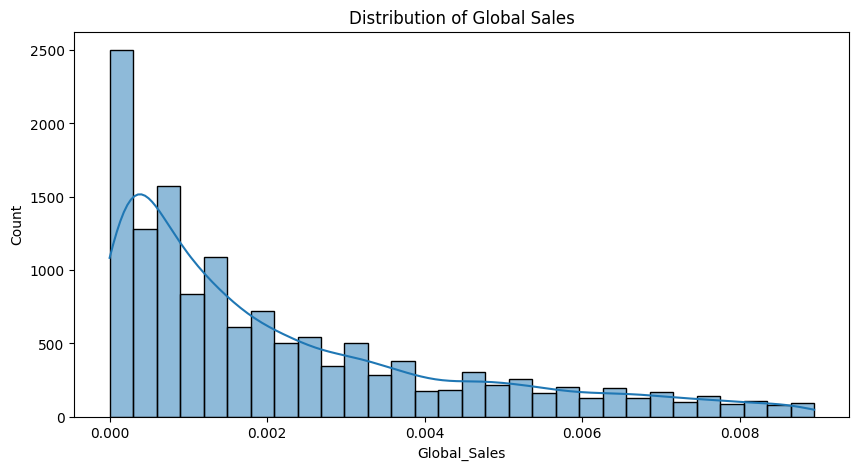

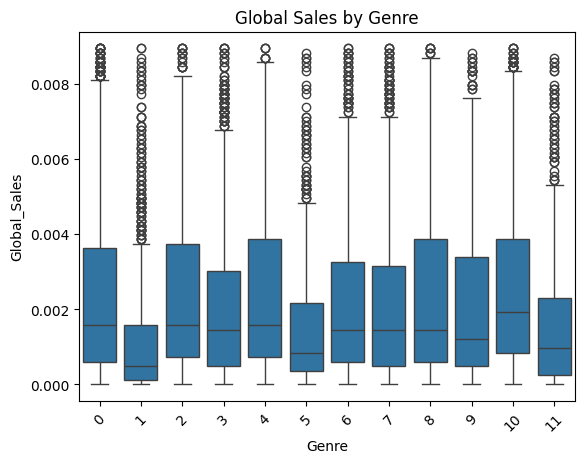

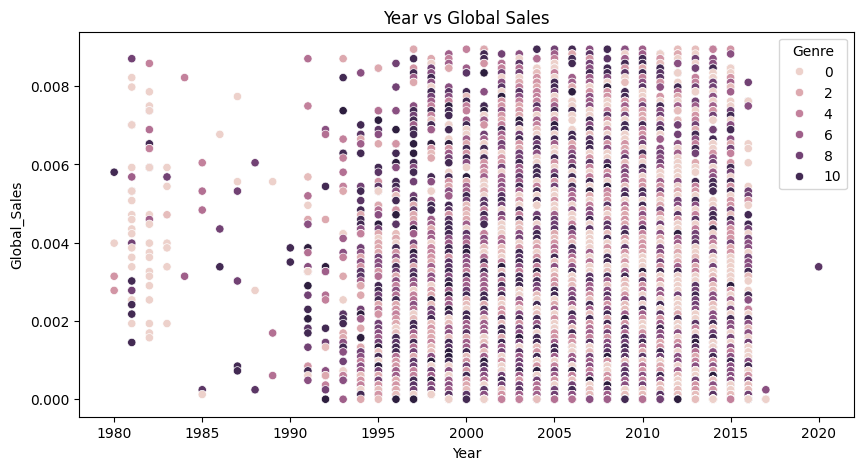

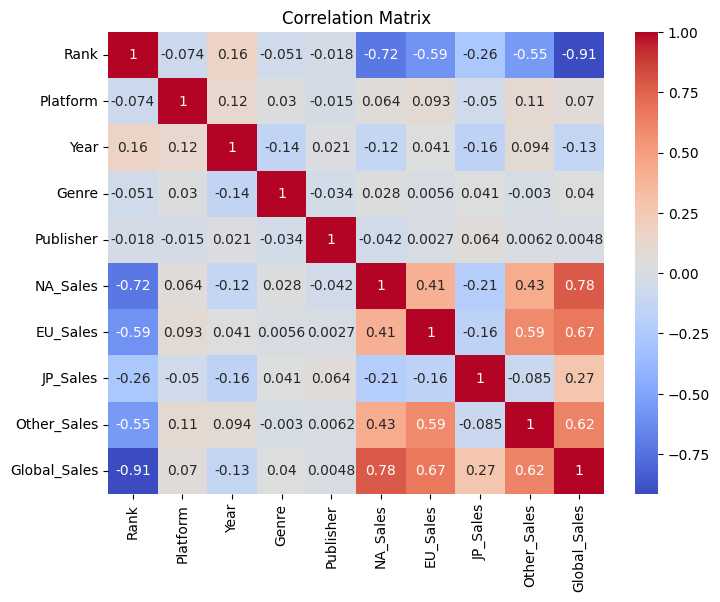

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Univariate
plt.figure(figsize=(10,5))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.show()

sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=45)
plt.title('Global Sales by Genre')
plt.show()

# 🔹 Bivariate
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year', y='Global_Sales', hue='Genre', data=df)
plt.title('Year vs Global Sales')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### ✅ 8. Multivariate Analysis 

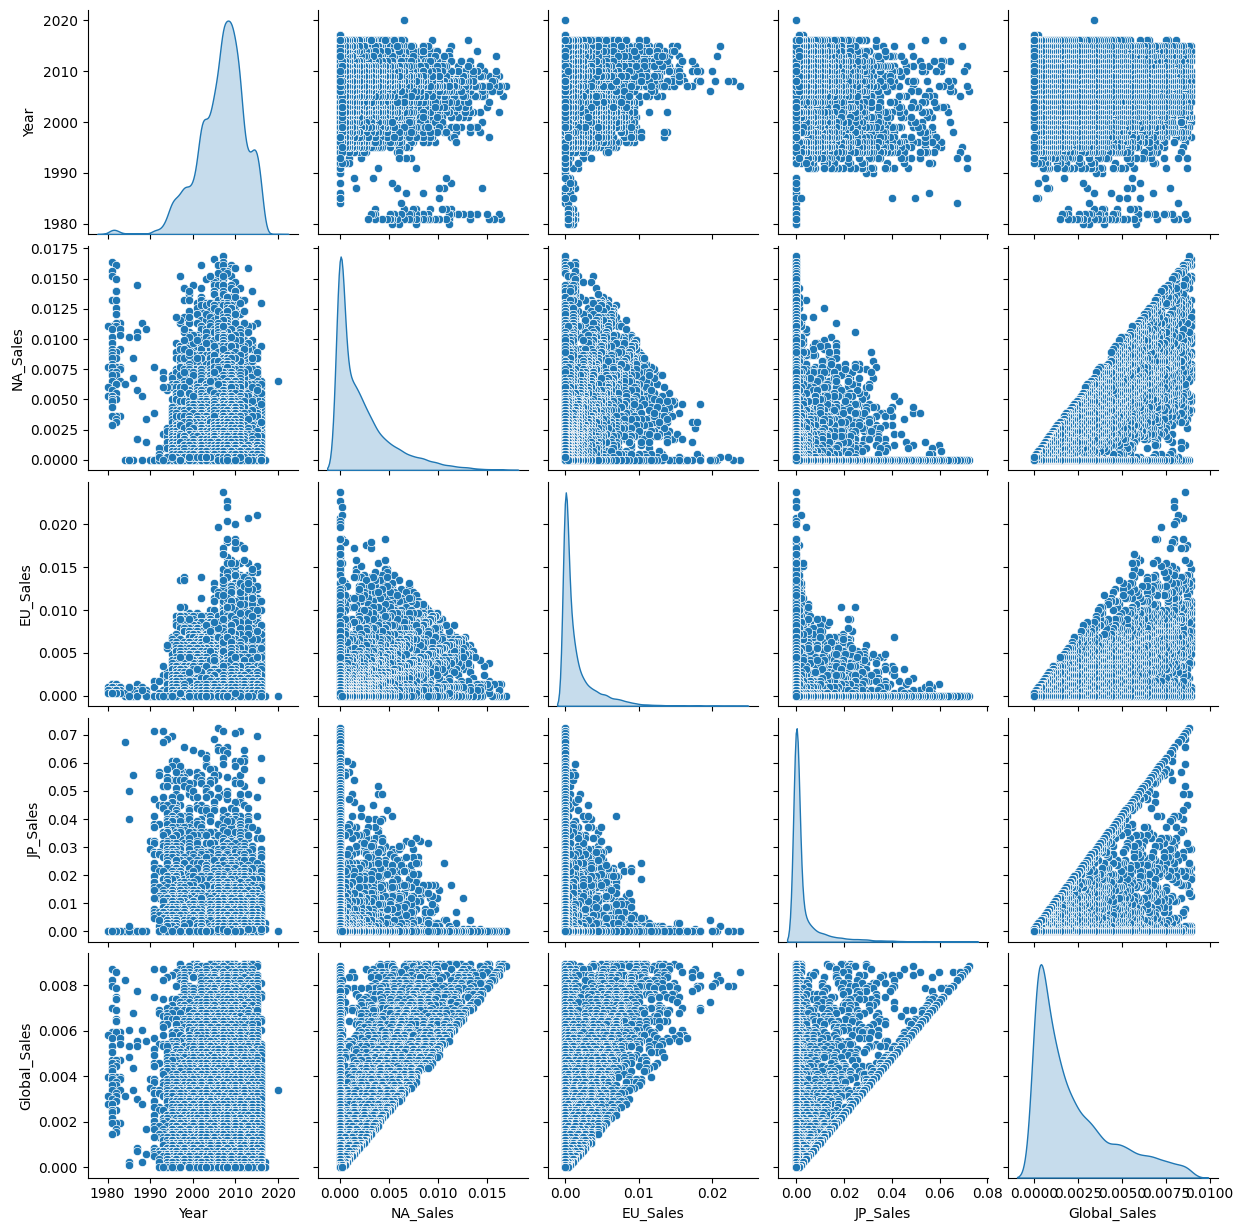

In [18]:
sns.pairplot(df[['Year','NA_Sales','EU_Sales','JP_Sales','Global_Sales']], diag_kind='kde')
plt.show()

### ✅ 9. Insights & Interpretation


## 🧠 Insights & Interpretation

### 🎮 1. Overview
- The dataset includes **16,000+ games** released across multiple platforms and genres from **1980–2020**.  
- Key features: `Genre`, `Platform`, `Publisher`, and regional/global sales figures.

### 🌍 2. Regional Sales
- **North America** leads global sales, followed by **Europe** and **Japan**.  
- Japan shows strong performance in **Role-Playing** and **Fighting** genres.

### 🕹️ 3. Platform & Genre Trends
- **PS2**, **X360**, and **Wii** dominate in total sales and game releases.  
- **Action**, **Sports**, and **Shooter** are the top-selling genres worldwide.  
- Sales peaked during **2005–2010**, then declined with the rise of digital gaming.

### 💰 4. Sales Distribution
- **Global_Sales** is **right-skewed** — few blockbuster games drive most revenue.  
- Most titles have sales below **1 million units** globally.

### 🔍 5. Correlations & Key Takeaways
- Strong correlation between **regional sales** and **global sales**.  
- **Genre + Platform** combinations heavily influence success.  
- **NA market dominance** and **hit-driven trends** define the gaming industry.

---

**Summary:**  
The video game market is dominated by a few high-performing titles, with regional preferences shaping sales trends. Action and Sports genres consistently outperform others, and the 2005–2010 period remains the golden age of console gaming.
